In [4]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import librosa

In [5]:
# Path to the dataset in JSON format, containing MFCCs (Mel-frequency cepstral coefficients) and labels.
DATA_PATH = "your/json/path/data_1.json"  # Change this to your path

In [6]:
# Load data
def load_data(data_path):
    """Loads training dataset from json file.

        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y

In [7]:
# Plot the training and test accuracy and error, to visualize the model performance
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs

        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

In [8]:
# Split MFCCs data into training, validation and test sets
def prepare_datasets(test_size, validation_size):
    """Loads data and splits it into train, validation and test sets.

    :param test_size (float): Value in [0, 1] indicating percentage of data set to allocate to test split
    :param validation_size (float): Value in [0, 1] indicating percentage of train set to allocate to validation split

    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input validation set
    :return X_test (ndarray): Input test set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target validation set
    :return y_test (ndarray): Target test set
    """

    # load data
    X, y = load_data(DATA_PATH)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    # add an axis to input sets
    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_validation, X_test, y_train, y_validation, y_test

In [9]:
# Build the CNN model
def build_model(input_shape):
    """Generates CNN model

    :param input_shape (tuple): Shape of input set
    :return model: CNN model
    """

    # build network topology
    model = keras.Sequential()

    # 1st conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 2nd conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 3rd conv layer
    model.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # flatten output and feed it into dense layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model


In [19]:
# Make a prediction using the trained model
def predict(model, X, y):
    """Predict a single sample using the trained model

    :param model: Trained classifier
    :param X: Input data
    :param y (int): Target
    """

    # add a dimension to input data for sample - model.predict() expects a 4d array in this case
    X = X[np.newaxis, ...] # array shape (1, 130, 13, 1)

    # perform prediction
    prediction = model.predict(X)

    # get index with max value
    predicted_index = np.argmax(prediction, axis=1)

    print("Target: {}, Predicted label: {}".format(y, predicted_index))
    return predicted_index

c:\Users\louis\sklearn-env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 11, 32)    │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 6, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 6, 32)      │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 4, 32)      │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 2, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 31, 2, 32)      │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 30, 1, 32)      │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 1, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 15, 1, 32)      │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 480)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        30,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,514 (177.79 KB)

 Trainable params: 45,322 (177.04 KB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.1784 - loss: 2.6224 - val_accuracy: 0.3353 - val_loss: 1.8287
Epoch 2/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.3649 - loss: 1.8227 - val_accuracy: 0.4353 - val_loss: 1.4977
Epoch 3/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.4328 - loss: 1.5963 - val_accuracy: 0.4853 - val_loss: 1.3744
Epoch 4/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.4598 - loss: 1.5042 - val_accuracy: 0.5173 - val_loss: 1.2883
Epoch 5/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.5009 - loss: 1.3828 - val_accuracy: 0.5587 - val_loss: 1.2121
Epoch 6/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.5126 - loss: 1.3440 - val_accuracy: 0.5627 - val_loss: 1.1889
Epoch 7/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.5365 - loss: 1.2599 - val_accuracy: 0.5827 - val_loss: 1.1366
Epoch 8/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.5676 - loss: 1.2106 - val_accu

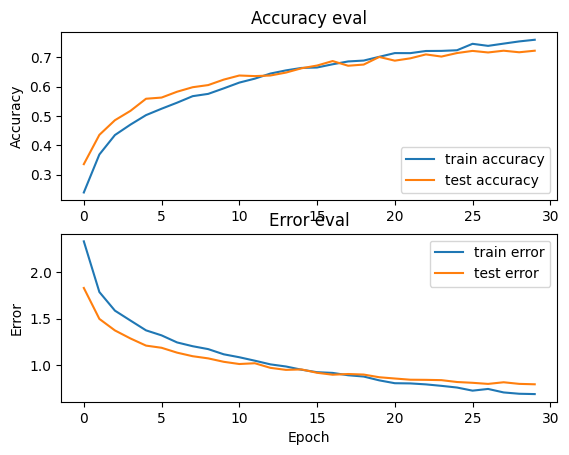

79/79 - 0s - 6ms/step - accuracy: 0.7259 - loss: 0.7953

Test accuracy: 0.7258903384208679
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
Target: 6, Predicted label: [6]


In [11]:
# Main function: train the model and make a prediction
if __name__ == "__main__":

    # get train, validation, test splits
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)

    # create network
    input_shape = (X_train.shape[1], X_train.shape[2], 1)
    model = build_model(input_shape)

    # compile model
    optimiser = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    # train model
    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)

    # plot accuracy/error for training and validation
    plot_history(history)

    # evaluate model on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    print('\nTest accuracy:', test_acc)

    # pick a sample to predict from the test set
    X_to_predict = X_test[101]
    y_to_predict = y_test[101]

    # predict sample
    predict(model, X_to_predict, y_to_predict)

In [12]:
# Make another prediction using the trained model

# pick a sample to predict from the test set
X_to_predict = X_test[13]
y_to_predict = y_test[13]

#Give the shape of X_to_predict
print("Shape of X_to_predict:" + str(X_to_predict.shape))
print("X_to_predict:" + str(X_to_predict))

# predict sample
predict(model, X_to_predict, y_to_predict)

Shape of X_to_predict:(130, 13, 1)
X_to_predict:[[[-2.37280106e+02]
  [ 1.24440773e+02]
  [ 3.80526352e+01]
  ...
  [-1.92756093e+00]
  [-1.15885086e+01]
  [-2.71044135e+00]]

 [[-2.19095932e+02]
  [ 1.15976318e+02]
  [ 2.83249569e+01]
  ...
  [-2.69812417e+00]
  [-1.12967615e+01]
  [-3.06269825e-01]]

 [[-2.20571243e+02]
  [ 1.16988571e+02]
  [ 2.04929314e+01]
  ...
  [-2.44209647e+00]
  [-1.18359032e+01]
  [-8.85038376e-02]]

 ...

 [[-1.66847076e+02]
  [ 1.44543610e+02]
  [ 9.69201469e+00]
  ...
  [-2.03291626e+01]
  [-2.22533178e+00]
  [ 1.68600082e+01]]

 [[-1.52262085e+02]
  [ 1.45117432e+02]
  [ 1.42721500e+01]
  ...
  [-1.66913414e+01]
  [-5.83180332e+00]
  [ 1.62109222e+01]]

 [[-1.49973831e+02]
  [ 1.46809021e+02]
  [ 1.54000750e+01]
  ...
  [-1.35280476e+01]
  [-6.85896778e+00]
  [ 1.22385530e+01]]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Target: 7, Predicted label: [7]


In [15]:
# Make a prediction using a new audio file that is not in the dataset

NEW_PATH = "your/path/your_music_file.wav"  # Change this to your path
SR = 22050
num_mfcc = 13
n_fft = 2048
hop_length = 512

y, sr = librosa.load(NEW_PATH, sr=SR)
y = y[:3*sr]
print(y.shape)

mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
mfcc = mfcc.T
print("Shape of mfcc: " + str(mfcc.shape))
print(mfcc)

mfcc = np.expand_dims(mfcc, axis=-1)
print("New shape of mfcc: " + str(mfcc.shape))
print("New mfcc:" + str(mfcc))

prediction = predict(model, mfcc, 0)

(66150,)
Shape of mfcc: (130, 13)
[[ -62.358784    90.2541      20.893005  ...  -13.552551    -7.1988716
   -24.57397  ]
 [ -95.94836    117.190186    35.406326  ...   -6.359219     2.222062
   -15.920228 ]
 [-242.39667    193.47656     31.715017  ...    3.7754276    5.8708305
     3.7749534]
 ...
 [-339.94565    104.54636     14.741621  ...  -13.262539    -7.9661565
    -5.0111933]
 [-330.7721     113.16796     18.453121  ...   -9.105757    -3.448665
    -1.6131015]
 [-330.9439     122.5428      20.759253  ...   -3.6663213    3.8310518
     7.4570293]]
New shape of mfcc: (130, 13, 1)
New mfcc:[[[ -62.358784 ]
  [  90.2541   ]
  [  20.893005 ]
  ...
  [ -13.552551 ]
  [  -7.1988716]
  [ -24.57397  ]]

 [[ -95.94836  ]
  [ 117.190186 ]
  [  35.406326 ]
  ...
  [  -6.359219 ]
  [   2.222062 ]
  [ -15.920228 ]]

 [[-242.39667  ]
  [ 193.47656  ]
  [  31.715017 ]
  ...
  [   3.7754276]
  [   5.8708305]
  [   3.7749534]]

 ...

 [[-339.94565  ]
  [ 104.54636  ]
  [  14.741621 ]
  ...
  [ -1

In [42]:
# Make a prediction using a new audio file that is not in the dataset. 
# This time, we split the audio file into the 10 first segments of 3 seconds each, and make a prediction for each segment.

# Configuration
NEW_PATH = "your/path/your_music_file.wav"  # Change this to your path
SR = 22050
num_mfcc = 13
n_fft = 2048
hop_length = 512
segment_duration = 3  # in seconds
total_duration = 30   # in seconds
num_segments = total_duration // segment_duration

# Load the first 30 seconds of the audio file
y, sr = librosa.load(NEW_PATH, sr=SR)
y = y[:total_duration * sr]

# List to store the predictions
predictions = []

# Loop for each segment of 3 seconds
for i in range(num_segments):
    # Extract the corresponding segment
    start = i * segment_duration * sr
    end = start + segment_duration * sr
    y_segment = y[start:end]

    # Calculate the MFCCs for this segment
    mfcc = librosa.feature.mfcc(y=y_segment, sr=sr, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
    mfcc = mfcc.T

    # Add a dimension to match the input shape of the model
    mfcc = np.expand_dims(mfcc, axis=-1)

    # Make a prediction on this segment
    prediction = predict(model, mfcc, 0)
    predictions.append(prediction.item())

# Show predictions
print("Predictions for each 3-second segment:")
print(predictions)

# Genre mapping
genre_mapping = [
    "blues",
    "classical",
    "country",
    "disco",
    "hiphop",
    "jazz",
    "metal",
    "pop",
    "reggae",
    "rock"
]

# Convert predictions to genre names
predicted_genres = [genre_mapping[prediction] for prediction in predictions]

# Show predicted numerical labels and associated genre names
print("Predicted numerical labels:", predictions)
print("Predicted genres:", predicted_genres)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Target: 0, Predicted label: [7]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Target: 0, Predicted label: [7]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Target: 0, Predicted label: [8]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Target: 0, Predicted label: [9]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Target: 0, Predicted label: [9]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Target: 0, Predicted label: [7]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Target: 0, Predicted label: [7]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Target: 0, Predicted label: [7]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Target: 0, Predicted label: [7]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Target: 0, Predicted label: [7]
Predictions for each 3-second segment:
[7, 7, 8, 9, 9, 7, 7, 7, 7, 7]
Predicted numerical labels: [7, 7, 8, 9, 9, 7, 7, 7, 7, 7]
Predicted genres: ['pop', 'pop', 'reggae', 'rock', 'rock', 'pop', 'pop', 'pop', 'pop', 'pop']
